In [1]:
import itertools
import gym
import torch
import torch.nn as nn

In [2]:
import _init_paths

add code root path (with `rllib`).


In [3]:
from rllib.reinforce import REINFORCE
from rllib.misc import total_weights

In [4]:
env = gym.make("CartPole-v1")
action_n = env.action_space.n
observation_shape = env.observation_space.shape

net = nn.Sequential(nn.Linear(observation_shape[0],128),nn.ReLU(),
                    nn.Linear(128,action_n))
print(net)
print("Model size:", total_weights(net))
agent = REINFORCE(model=net, gamma=0.99, learning_rate=1.e-3, batch_size=1)

Sequential(
  (0): Linear(in_features=4, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=2, bias=True)
)
Model size: 898


In [5]:
running_reward = 0

for episode in range(2000):
    obs = env.reset()
    total_reward = 0
    for step in itertools.count(start=1, step=1):
        action, log_prob = agent.select_action(torch.Tensor(obs))
        obs, reward, done, _ = env.step(action)
        agent.keep_for_policy_grad(log_prob, reward)
        if step>=50000: # don't exceed
            print("Seems much but not enough")
            break
        if done:
             break
    agent.step() 
    
    total_reward, n_round, train_loss = agent.history[-1]
    
    count_gamma = 0.99
    running_reward = count_gamma*running_reward+(1-count_gamma)*total_reward
    print(episode, total_reward, running_reward)
    if running_reward>env.spec.reward_threshold:
        break
        
print("Finished: %s@%s" %(running_reward,episode))

0 20.0 0.20000000000000018
1 14.0 0.3380000000000003
2 9.0 0.4246200000000004
3 12.0 0.5403738000000005
4 17.0 0.7049700620000006
5 41.0 1.107920361380001
6 16.0 1.256841157766201
7 44.0 1.6842727461885394
8 31.0 1.9774300187266542
9 26.0 2.2176557185393877
10 13.0 2.325479161353994
11 34.0 2.642224369740454
12 14.0 2.7558021260430494
13 13.0 2.858244104782619
14 16.0 2.989661663734793
15 27.0 3.2297650470974455
16 37.0 3.567467396626471
17 13.0 3.6617927226602065
18 63.0 4.2551747954336046
19 29.0 4.502623047479268
20 15.0 4.607596817004476
21 22.0 4.781520848834431
22 15.0 4.883705640346086
23 14.0 4.974868583942625
24 14.0 5.065119898103198
25 14.0 5.154468699122166
26 30.0 5.402924012130944
27 20.0 5.548894772009635
28 32.0 5.813405824289538
29 32.0 6.075271766046643
30 15.0 6.164519048386177
31 19.0 6.292873857902316
32 18.0 6.409945119323293
33 12.0 6.4658456681300605
34 14.0 6.54118721144876
35 19.0 6.665775339334273
36 13.0 6.72911758594093
37 12.0 6.78182641008152
38 10.0 6.81

In [6]:
torch.save(net.state_dict(), "reinforce.pth")

In [7]:
for i in range(5):
    obs = env.reset()
    total_reward=0
    for _ in range(10000): # not exceed 10000 episodes
        action = agent.play(obs)
        obs, reward, done, _ = env.step(action)
        env.render()
        total_reward+=reward
        if done:
             break
    print("Encore: %s"%total_reward)

Encore: 500.0
Encore: 500.0
Encore: 500.0
Encore: 500.0
Encore: 500.0


In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

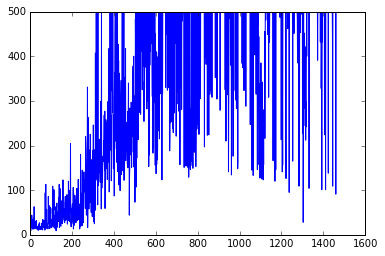

In [10]:
plt.plot([h[0] for h in agent.history])